In [2]:
import re
import pandas as pd

In [3]:
with open('ath.fasta') as fget:
    contents = fget.read().split('>')

In [4]:
d = {}
for record in contents[1:]:
    tem = record.split('\n')
    try:
        match_object = re.match(r'.*\|geneid=(.*?)\|', tem[0])
        geneid = match_object.group(1)
    except AttributeError:
        pass
    seq = ''.join(tem[1:])
    d[geneid] = d.get(geneid, '') + seq

In [5]:
df_ref = pd.read_table('../to_rf.tsv', sep='\t', index_col = 'Probe Set ID')
columns = list(df_ref.columns)[4:]
columns.remove('class')
del df_ref

In [6]:
for geneid, seq in d.items():
    cache = re.match('(TGTC.{6,12}CTGT)', seq)
    if cache:
        print(geneid, cache.groups())
    '''
    for ele in columns:
        pattern = '.{7,9}'.join(ele.split('_'))
        print(re.match(pattern, seq))
    break
    '''

828892 ('TGTCTCGTTCTAGCTGT',)
28720531 ('TGTCGTTCAGCCTGT',)


In [7]:
for geneid, seq in d.items():
    cache = re.match('(TGTC.{6,14}GACA)', seq)
    if cache:
        print(geneid, cache.groups())
    '''
    for ele in columns:
        pattern = '.{7,9}'.join(ele.split('_'))
        print(re.match(pattern, seq))
    break
    '''

841453 ('TGTCATGATCACTTGACA',)
819060 ('TGTCACAGCAGTCGACA',)
28717530 ('TGTCGAGGGTGTGACA',)
28719438 ('TGTCGATAGCGACA',)


In [8]:
result = {}
for geneid, seq in d.items():
    cache = re.match('(TGTC.{2})', seq)
    if cache:
        result[geneid] = cache.groups()
    '''
    for ele in columns:
        pattern = '.{7,9}'.join(ele.split('_'))
        print(re.match(pattern, seq))
    break
    '''

In [10]:
flat_result = {}
for key, value in result.items():
    for gid in key.split(','):
        flat_result[gid] = value[0]

In [13]:
df_anno = pd.read_csv('/home/yijia/Desktop/DEG_analysis/NAA_analysis/Arabidopsis thaliana/ATH1-121501.na36.annot.csv')

In [33]:
list(df_anno[df_anno['Entrez Gene'] == '843750']['Probe Set ID'])[0]

'260387_at'

In [34]:
PSID_result = {}
for key, value in flat_result.items():
    try:
        PSID = list(df_anno[df_anno['Entrez Gene'] == key]['Probe Set ID'])[0]
        PSID_result[PSID] = value
    except Exception as e:
        print(e)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

In [38]:
df_element = pd.DataFrame(list(PSID_result.items()))

In [39]:
df_element

,0,1
0,264171_at,TGTCAA
1,262121_at,TGTCAG
2,264610_at,TGTCGG
3,261809_at,TGTCAT
4,264507_at,TGTCAT
5,259398_at,TGTCAT
6,245641_at,TGTCGT
7,265162_at,TGTCGC
8,262463_at,TGTCAT
9,262255_at,TGTCAT


In [40]:
%matplotlib inline

import pickle
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel, RFE, RFECV

In [42]:
df = pd.read_table('../integrated.tsv', sep='\t', index_col = 'Probe Set ID')[['NAA_mean', 'IAA_mean','p-value','NAA-IAA']]

In [86]:
df[df['NAA_mean'] - df['IAA_mean'] < -2]

,NAA_mean,IAA_mean,p-value,NAA-IAA,TGTCGT,TGTCTC,TGTCGC,TGTCAA,TGTCGG,TGTCAC,TGTCCC,TGTCCT,TGTCTG,TGTCAG,TGTCAT,TGTCTA,TGTCTT,TGTCCA
Probe Set ID,,,,,,,,,,,,,,,,,,
245076_at,3.722903,6.805183,0.008938,-3.082280,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245077_at,-0.308515,1.836387,0.015799,-2.144902,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245090_at,-1.410666,0.710400,0.035672,-2.121066,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245136_at,-1.932710,0.459807,0.010442,-2.392518,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245153_at,-0.964379,1.054803,0.020806,-2.019182,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245204_at,-1.923666,0.191320,0.029938,-2.114985,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245469_at,-2.773101,-0.695283,0.071887,-2.077818,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245553_at,-0.842402,1.194718,0.013309,-2.037121,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245560_at,-1.387128,0.972299,0.015549,-2.359426,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
AuxREs = list(set(PSID_result.values()))

['TGTCGT',
 'TGTCTC',
 'TGTCGC',
 'TGTCAA',
 'TGTCGG',
 'TGTCAC',
 'TGTCCC',
 'TGTCCT',
 'TGTCTG',
 'TGTCAG',
 'TGTCAT',
 'TGTCTA',
 'TGTCTT',
 'TGTCCA']

In [45]:
for AuxRE in AuxREs:
    df[AuxRE] = 0
for key, value in PSID_result.items():
    df.loc[key, value] += 1
#df.to_csv('AuxRE_count_all.tsv', sep='\t')

In [53]:
with_AuxRE = df[df['TGTCTC']+df['TGTCTG']+df['TGTCGG']+df['TGTCCA']+df['TGTCAT']+df['TGTCAG']+df['TGTCGC']+df['TGTCTA']+df['TGTCAA']+df['TGTCGT']+df['TGTCTT']+df['TGTCCC']+df['TGTCCT']+df['TGTCAC'] >= 1]
with_AuxRE.to_csv('promoter_with_AuxRE.tsv', sep='\t')

In [54]:
to_rf = with_AuxRE.copy()
to_rf['class'] = 0
for i in with_AuxRE.index:
    if to_rf.loc[i, 'NAA-IAA'] >= 1:
        to_rf.loc[i, 'class'] = 0
    elif to_rf.loc[i, 'NAA-IAA'] >= 0.5:
        to_rf.loc[i, 'class'] = 1
    elif to_rf.loc[i, 'NAA-IAA'] >= 0:
        to_rf.loc[i, 'class'] = 2
    elif to_rf.loc[i, 'NAA-IAA'] >= -0.5:
        to_rf.loc[i, 'class'] = 3
    elif to_rf.loc[i, 'NAA-IAA'] >= -1:
        to_rf.loc[i, 'class'] = 4
    else:
        to_rf.loc[i, 'class'] = 5

,NAA_mean,IAA_mean,p-value,NAA-IAA,TGTCGT,TGTCTC,TGTCGC,TGTCAA,TGTCGG,TGTCAC,TGTCCC,TGTCCT,TGTCTG,TGTCAG,TGTCAT,TGTCTA,TGTCTT,TGTCCA,class
Probe Set ID,,,,,,,,,,,,,,,,,,,
245341_at,-0.195868,0.000823,0.493042,-0.196691,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
245604_at,0.085949,-0.746957,0.008400,0.832907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
245641_at,-0.229192,-0.226666,0.991265,-0.002526,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
245943_at,-0.228244,0.365762,0.489465,-0.594006,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4
246125_at,-0.028185,-0.236490,0.613994,0.208305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
247912_at,-0.656348,-0.518475,0.614504,-0.137873,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
248078_at,-0.369745,0.229914,0.268882,-0.599659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4
249338_at,0.046248,0.446648,0.404348,-0.400400,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
249875_at,-0.761942,0.053716,0.049592,-0.815659,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4


In [55]:
columns = list(to_rf.columns)
columns.remove('NAA_mean')
columns.remove('IAA_mean')
columns.remove('p-value')
columns.remove('NAA-IAA')
columns.remove('class')

In [56]:
estimator = linear_model.Lasso()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(to_rf[columns], to_rf['NAA-IAA'])
print(selector.support_)
print('===================')
print(selector.ranking_)

[False False False False False False False False False  True  True  True
  True  True]
[10  9  8  7  6  5  4  3  2  1  1  1  1  1]


In [60]:
columns[selector.support_[feature for feature, tag in zip(columns, rfecv.get_support()) if tag]]

TypeError: only integer scalar arrays can be converted to a scalar index

### RFECV

Optimal number of features : 8


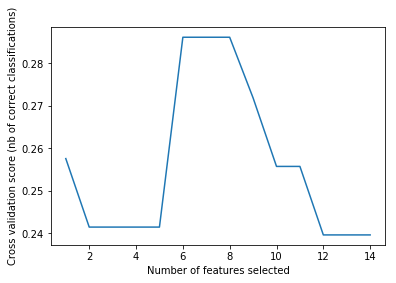

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=3341, n_features=25, n_informative=3,
#                          n_redundant=2, n_repeated=0, n_classes=8,
#                          n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(to_rf[columns], np.array(to_rf['class'], dtype=int))

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [62]:
l = [feature for feature, tag in zip(columns, rfecv.get_support()) if tag]
l

['TGTCTC',
 'TGTCGC',
 'TGTCGG',
 'TGTCAC',
 'TGTCCT',
 'TGTCTG',
 'TGTCTA',
 'TGTCTT']

In [85]:
', '.join(l)

'TGTCTC, TGTCGC, TGTCGG, TGTCAC, TGTCCT, TGTCTG, TGTCTA, TGTCTT'

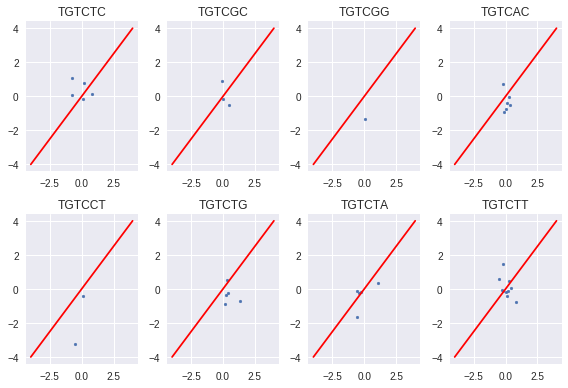

In [65]:
plt.style.use(u'seaborn')
fig = plt.figure(1)#, figsize=(10,9))
subplots = [plt.subplot(2, 4, 1+i) for i in range(8)]
for i, AuxRE in zip(range(8), l):
    subplots[i].scatter(x='IAA_mean', y='NAA_mean', data=df[df[AuxRE]==1], s=8)
    subplots[i].plot([-4,4], [-4,4], 'r')
    subplots[i].set_title(AuxRE)
fig.tight_layout()

In [69]:
with_AuxRE['AuxRE'] = 0

/home/yijia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
def splited_violinplot(dataf, x, order=None, bw=.2, figsize=(8,7)):
    df_copy = dataf.copy()
    l = len(df_copy)
    df_copy['logFC_mean'] = 0
    df_copy['hue'] = 'Null'
    df_copy = pd.concat([df_copy, df_copy], ignore_index=True)
    for i in range(l):
        df_copy.loc[i, 'logFC_mean'] = df_copy.loc[i, 'IAA_mean']
        df_copy.loc[i, 'hue'] = 'IAA'
        df_copy.loc[i+l, 'logFC_mean'] = df_copy.loc[i, 'NAA_mean']
        df_copy.loc[i+l, 'hue'] = 'NAA'
    plt.figure(figsize=figsize)
    if order is None:
        return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, bw=bw)
    return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, order=order, bw=bw)

In [82]:
df_selected = with_AuxRE[['NAA_mean', 'IAA_mean','p-value','NAA-IAA'] + l + ['AuxRE']]
df_selected['AuxRE'] = with_AuxRE['TGTCTC'] + with_AuxRE['TGTCGC'] + with_AuxRE['TGTCGG'] + with_AuxRE['TGTCAC'] + with_AuxRE['TGTCCT'] + with_AuxRE['TGTCTG'] + with_AuxRE['TGTCTA'] + with_AuxRE['TGTCTT']

/home/yijia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


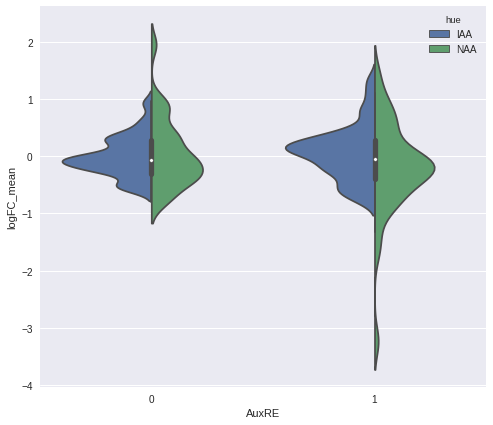

In [84]:
splited_violinplot(df_selected, 'AuxRE', bw=.3)